First, let's import everything we need, and load some cloud point data:

In [1]:
# Import the Graph Operator - handles data preparation, model creation/recall, hand-off of data to model
from graphchem import GraphOperator

In [2]:
# Other dependencies are for data segmentation, set metric calculations, plotting
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
from matplotlib import pyplot as plt

In [3]:
# Load some cloud point data
from graphchem.datasets import load_cp
smiles, cp = load_cp()
print(smiles[:3], '\n', cp[:3])

['CCCCCCOCCOCCOCCO', 'CCCCCCOCCOCCOCCOCCO', 'CCCCCCOCCOCCOCCOCCOCCO'] 
 [[40.5], [63.8], [75.0]]


In [4]:
# Create training, testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    smiles, cp, test_size=0.20, random_state=42
)
print(len(X_train), len(y_train), len(X_test), len(y_test))

34 34 9 9


We need to set up some variables for our training process (i.e. hyper-parameters). In the future, these will be tunable to reduce model error.

In [5]:
training_config = {
    'task': 'graph',
    'valid_size': 0.2,
    'valid_epoch_iter': 1,
    'valid_patience': 64,
    'batch_size': 8,
    'learning_rate': 0.001,
    'lr_decay': 0.0000001,
    'epochs': 500,
    'verbose': 1
}

We also need to define our model's architecture:

In [6]:
model_config = {
    'n_messages': 2,
    'n_hidden': 3,
    'hidden_msg_dim': 128,
    'hidden_dim': 256,
    'dropout': 0.01
}

Now let's initialize the Graph Operator, and train our model:

In [7]:
go = GraphOperator(config=training_config)
go.train(X_train, y_train, model_config=model_config)

/Users/tjkessler/anaconda3/envs/torch_geometric/lib/python3.8/site-packages/graphchem-1.0.0-py3.8.egg/graphchem/operator.py:43: UserWarning: device config value not found: default value set, cpu
  warnings.warn(


Epoch: 0 | Train Loss: 9823.79089807581 | Valid Loss: 2940.29296875
Epoch: 1 | Train Loss: 3145.563774956597 | Valid Loss: 304.2599182128906
Epoch: 2 | Train Loss: 765.0473587601273 | Valid Loss: 304.2599182128906
Epoch: 3 | Train Loss: 554.9449869791666 | Valid Loss: 304.2599182128906
Epoch: 4 | Train Loss: 769.2982381184896 | Valid Loss: 304.2599182128906
Epoch: 5 | Train Loss: 841.2907127097801 | Valid Loss: 299.7872619628906
Epoch: 6 | Train Loss: 568.6480712890625 | Valid Loss: 299.7872619628906
Epoch: 7 | Train Loss: 651.2863226996528 | Valid Loss: 299.7872619628906
Epoch: 8 | Train Loss: 464.5363340024595 | Valid Loss: 299.7872619628906
Epoch: 9 | Train Loss: 485.8194122314453 | Valid Loss: 284.63104248046875
Epoch: 10 | Train Loss: 514.3078703703703 | Valid Loss: 284.63104248046875
Epoch: 11 | Train Loss: 506.75633635344326 | Valid Loss: 284.63104248046875
Epoch: 12 | Train Loss: 475.68306025752315 | Valid Loss: 284.63104248046875
Epoch: 13 | Train Loss: 433.72167629665796 | Va

Epoch: 112 | Train Loss: 549.5567073115596 | Valid Loss: 199.36605834960938
Epoch: 113 | Train Loss: 392.5541178385417 | Valid Loss: 199.36605834960938
Epoch: 114 | Train Loss: 374.69854736328125 | Valid Loss: 199.36605834960938
Epoch: 115 | Train Loss: 379.01911304615163 | Valid Loss: 199.36605834960938
Epoch: 116 | Train Loss: 381.858376538312 | Valid Loss: 199.36605834960938
Epoch: 117 | Train Loss: 322.9126038727937 | Valid Loss: 199.36605834960938
Epoch: 118 | Train Loss: 415.83428842050057 | Valid Loss: 199.36605834960938
Epoch: 119 | Train Loss: 543.028322007921 | Valid Loss: 199.36605834960938
Epoch: 120 | Train Loss: 357.8740980360243 | Valid Loss: 199.36605834960938
Epoch: 121 | Train Loss: 424.6994890283655 | Valid Loss: 199.36605834960938
Epoch: 122 | Train Loss: 380.96386492693864 | Valid Loss: 199.36605834960938
Epoch: 123 | Train Loss: 483.7409860116464 | Valid Loss: 199.36605834960938
Epoch: 124 | Train Loss: 473.20372970015916 | Valid Loss: 199.36605834960938
Epoch: 12

Epoch: 224 | Train Loss: 333.3748474121094 | Valid Loss: 46.60895538330078
Epoch: 225 | Train Loss: 110.16744373462818 | Valid Loss: 46.60895538330078
Epoch: 226 | Train Loss: 131.4993142022027 | Valid Loss: 46.60895538330078
Epoch: 227 | Train Loss: 101.00182653356481 | Valid Loss: 46.60895538330078
Epoch: 228 | Train Loss: 107.7585523393419 | Valid Loss: 46.60895538330078
Epoch: 229 | Train Loss: 84.7030903145119 | Valid Loss: 46.60895538330078
Epoch: 230 | Train Loss: 71.71619556568287 | Valid Loss: 46.60895538330078
Epoch: 231 | Train Loss: 224.63322279188367 | Valid Loss: 46.60895538330078
Epoch: 232 | Train Loss: 147.04429287380643 | Valid Loss: 46.60895538330078
Epoch: 233 | Train Loss: 104.6241359004268 | Valid Loss: 46.60895538330078
Epoch: 234 | Train Loss: 118.36395602756076 | Valid Loss: 46.60895538330078
Epoch: 235 | Train Loss: 130.7840347290039 | Valid Loss: 46.60895538330078
Epoch: 236 | Train Loss: 95.90229966905382 | Valid Loss: 46.60895538330078
Epoch: 237 | Train Lo

Let's get predictions, then calculate prediction errors for the training and testing subsets:

In [8]:
y_train_pred = go.use(X_train)
y_test_pred = go.use(X_test)

mae_test = median_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = median_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test Set: R2 = {}, MAE = {}'.format(r2_test, mae_test))
print('Train Set: R2 = {}, MAE = {}'.format(r2_train, mae_train))

Test Set: R2 = 0.7109448620627039, MAE = 14.156970977783203
Train Set: R2 = 0.8580065110245041, MAE = 8.13055591583252


And let's plot our results:

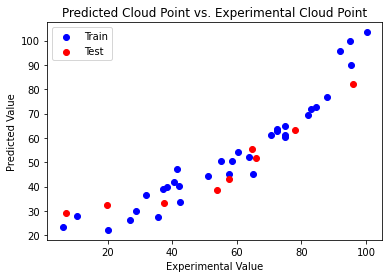

In [9]:
plt.title('Predicted Cloud Point vs. Experimental Cloud Point')
plt.xlabel('Experimental Value')
plt.ylabel('Predicted Value')
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.legend(loc='upper left')
plt.show()